<a href="https://colab.research.google.com/github/newguy7/DataScienceProjects/blob/main/credit_card_transactions_fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
training_df = pd.read_csv('fraudTrain.csv')
testing_df = pd.read_csv('fraudTest.csv')

In [ ]:
#Before we merge, lets see if the columns are same:
if training_df.columns.equals(testing_df.columns):
    print("Column names are the same.")
else:
    print("Column names are different.")

Column names are the same.


In [ ]:
# Merging training and testing dataset
merged_df = pd.concat([training_df, testing_df], ignore_index=True)

In [ ]:
#Shuffling the datasets
merged_df = merged_df.sample(frac=1).reset_index(drop=True)

In [ ]:
merged_df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,1156585,2020-04-27 13:44:42,4988304376504,fraud_Kub-Heaney,health_fitness,33.66,William,Thompson,M,977 Rita Grove Apt. 000,...,41.4575,-74.1659,2258,Building surveyor,1937-03-17,dd6ccf663e6e932aeb0c7b9842a3ece2,1367070282,40.664230,-74.133954,0
1,181827,2020-08-24 06:22:55,345389171551808,fraud_Parisian and Sons,gas_transport,62.70,Justin,Fowler,M,5569 Phillips Neck Apt. 003,...,33.9215,-89.6782,3451,Financial trader,1984-05-19,6fa4894548aa0c03df5c4f7a75f3255f,1377325375,34.182698,-88.998504,0
2,540455,2019-08-19 15:01:13,6592074504369261,fraud_Botsford Ltd,shopping_pos,7.37,Amanda,Molina,F,8425 Daniel Knolls Suite 288,...,40.0897,-74.9781,1526206,Commercial horticulturist,1972-05-23,c38c0088ba174d80f49861c0b77fb3db,1345388473,39.875044,-75.023466,0
3,1213872,2020-05-23 00:38:03,3514865930894695,fraud_Erdman-Kertzmann,gas_transport,61.22,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,...,32.9396,-105.8189,899,Naval architect,1967-08-30,76569b985fe207d1584811fe3d905b66,1369269483,33.627954,-106.254414,0
4,1116982,2020-04-10 00:21:41,2222001896600109,fraud_Ledner-Pfannerstill,gas_transport,37.60,Susan,Hernandez,F,2193 Osborne Run Apt. 789,...,38.9318,-89.9618,2401,"Buyer, industrial",1972-01-03,ba23a0aec2332438032145771a1efd00,1365553301,39.651609,-90.432235,0


In [ ]:
merged_df.tail()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
1852389,426881,2019-07-10 17:47:12,4797297220948468262,fraud_Bednar PLC,kids_pets,16.54,Erica,Briggs,F,3310 Davidson Spurs Apt. 107,...,38.8938,-86.5246,1228,Counsellor,1991-03-13,2e5cb633fb1cf4b34887d6e115f34736,1341942432,37.898763,-85.833637,0
1852390,1293500,2020-06-20 07:13:28,4855853415727304322,fraud_Kunze Inc,grocery_pos,43.46,Justin,Aguilar,M,184 Miller Manors,...,44.8232,-89.1665,3223,Senior tax professional/tax inspector,1954-06-30,adbe1c601eeafa181d5433cb5c278d49,1371712408,44.092863,-89.953045,0
1852391,521904,2020-12-24 10:19:06,378006354724784,fraud_Pfeffer LLC,grocery_net,47.57,Christopher,Matthews,M,433 John Heights Apt. 849,...,38.5095,-78.2638,395,Senior tax professional/tax inspector,1982-01-07,c54763fb72fb689e73e84e9e6b90b435,1387880346,37.772587,-78.554835,0
1852392,553143,2019-08-24 18:27:25,30103132002433,fraud_Dare-Gibson,health_fitness,90.47,Stephanie,Middleton,F,99736 Rose Shoals Apt. 504,...,41.0001,-78.2357,3688,Dispensing optician,1987-10-26,adb70fc0251db8288a1d49830373f629,1345832845,41.704641,-77.485288,0
1852393,427521,2020-12-03 17:22:14,4292743669224718067,"fraud_Turner, Ruecker and Parisian",misc_pos,6.16,Michael,Williams,M,35822 Clayton Street Apt. 679,...,38.2674,-76.4954,5927,Art therapist,1973-06-09,385ada6ccfe76bd7b0093b49c1ad34c1,1386091334,39.134851,-77.445082,0


In [ ]:
import numpy as np
# check nan values in the is_fraud column
merged_df[merged_df['is_fraud'].isna()]

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud


In [ ]:
merged_df.isna().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [ ]:
# Remove the rows with nan values
clean_df = merged_df.dropna()

In [ ]:
# check for nan values
clean_df.isna().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [ ]:
clean_df = clean_df.drop(['Unnamed: 0'],axis=1)

In [ ]:
# Show all columns
pd.set_option('display.max_columns',None)

In [ ]:
clean_df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2020-04-27 13:44:42,4988304376504,fraud_Kub-Heaney,health_fitness,33.66,William,Thompson,M,977 Rita Grove Apt. 000,Rock Tavern,NY,12575,41.4575,-74.1659,2258,Building surveyor,1937-03-17,dd6ccf663e6e932aeb0c7b9842a3ece2,1367070282,40.664230,-74.133954,0
1,2020-08-24 06:22:55,345389171551808,fraud_Parisian and Sons,gas_transport,62.70,Justin,Fowler,M,5569 Phillips Neck Apt. 003,Coffeeville,MS,38922,33.9215,-89.6782,3451,Financial trader,1984-05-19,6fa4894548aa0c03df5c4f7a75f3255f,1377325375,34.182698,-88.998504,0
2,2019-08-19 15:01:13,6592074504369261,fraud_Botsford Ltd,shopping_pos,7.37,Amanda,Molina,F,8425 Daniel Knolls Suite 288,Philadelphia,PA,19154,40.0897,-74.9781,1526206,Commercial horticulturist,1972-05-23,c38c0088ba174d80f49861c0b77fb3db,1345388473,39.875044,-75.023466,0
3,2020-05-23 00:38:03,3514865930894695,fraud_Erdman-Kertzmann,gas_transport,61.22,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,High Rolls Mountain Park,NM,88325,32.9396,-105.8189,899,Naval architect,1967-08-30,76569b985fe207d1584811fe3d905b66,1369269483,33.627954,-106.254414,0
4,2020-04-10 00:21:41,2222001896600109,fraud_Ledner-Pfannerstill,gas_transport,37.60,Susan,Hernandez,F,2193 Osborne Run Apt. 789,Moro,IL,62067,38.9318,-89.9618,2401,"Buyer, industrial",1972-01-03,ba23a0aec2332438032145771a1efd00,1365553301,39.651609,-90.432235,0


In [ ]:
clean_df.shape
print(f"Data has {clean_df.shape[0]} rows and {clean_df.shape[1]} columns.")

Data has 1852394 rows and 22 columns.


In [ ]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 22 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   trans_date_trans_time  object 
 1   cc_num                 int64  
 2   merchant               object 
 3   category               object 
 4   amt                    float64
 5   first                  object 
 6   last                   object 
 7   gender                 object 
 8   street                 object 
 9   city                   object 
 10  state                  object 
 11  zip                    int64  
 12  lat                    float64
 13  long                   float64
 14  city_pop               int64  
 15  job                    object 
 16  dob                    object 
 17  trans_num              object 
 18  unix_time              int64  
 19  merch_lat              float64
 20  merch_long             float64
 21  is_fraud               int64  
dtypes: float64(5), int

In [ ]:
category_df = clean_df['category'].value_counts()
category_df

category
gas_transport     188029
grocery_pos       176191
home              175460
shopping_pos      166463
kids_pets         161727
shopping_net      139322
entertainment     134118
food_dining       130729
personal_care     130085
health_fitness    122553
misc_pos          114229
misc_net           90654
grocery_net        64878
travel             57956
Name: count, dtype: int64

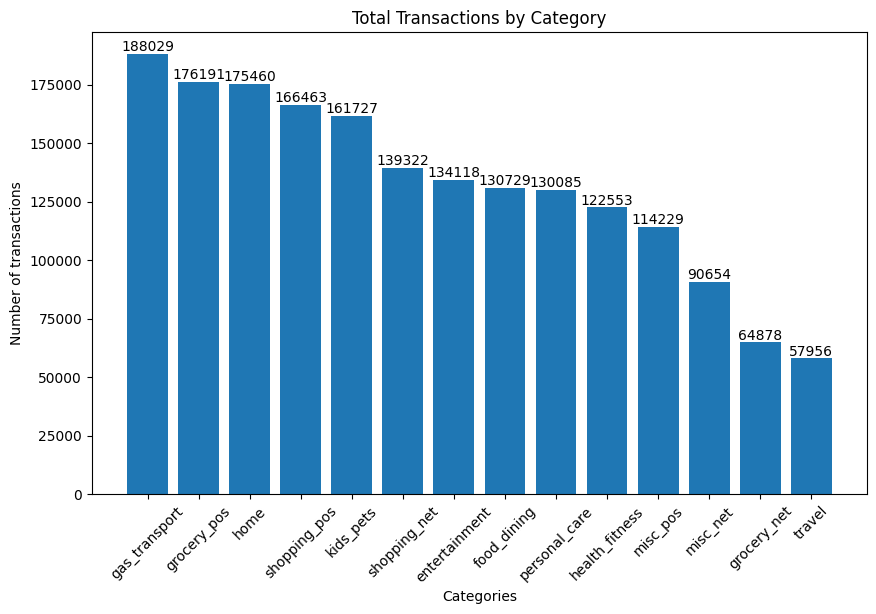

In [ ]:
import matplotlib.pyplot as plt

def add_labls(x,y):
  for k in range(len(x)):
    plt.text(k,y[k],y[k],ha='center',va='bottom')

plt.figure(figsize=(10,6))

plt.bar(category_df.index,category_df.values)
add_labls(category_df.index,category_df.values)
plt.xticks(rotation=45)
plt.xlabel('Categories')
plt.ylabel('Number of transactions')
plt.title('Total Transactions by Category')

plt.show()

In [ ]:
state_df = clean_df['state'].value_counts()

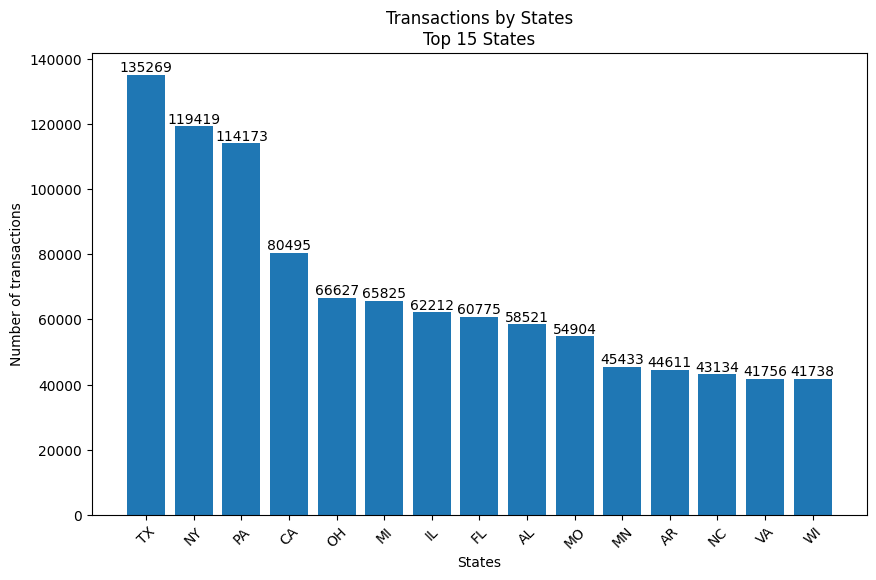

In [ ]:
plt.figure(figsize=(10,6))

plt.bar(state_df[:15].index,state_df[:15].values)
add_labls(state_df[:15].index,state_df[:15].values)
plt.xticks(rotation=45)
plt.xlabel('States')
plt.ylabel('Number of transactions')
plt.title('Transactions by States\nTop 15 States')

plt.show()

In [ ]:
# Convert trans_date_trans_time to datetime
clean_df['trans_date_trans_time'] = pd.to_datetime(clean_df['trans_date_trans_time'])

In [ ]:
# Aggregate by month
clean_df['month'] = clean_df['trans_date_trans_time'].dt.to_period('M')
transactions_by_month = clean_df.groupby('month').size()

In [ ]:
transactions_by_month.index.unique()

PeriodIndex(['2019-01', '2019-02', '2019-03', '2019-04', '2019-05', '2019-06',
             '2019-07', '2019-08', '2019-09', '2019-10', '2019-11', '2019-12',
             '2020-01', '2020-02', '2020-03', '2020-04', '2020-05', '2020-06',
             '2020-07', '2020-08', '2020-09', '2020-10', '2020-11', '2020-12'],
            dtype='period[M]', name='month')

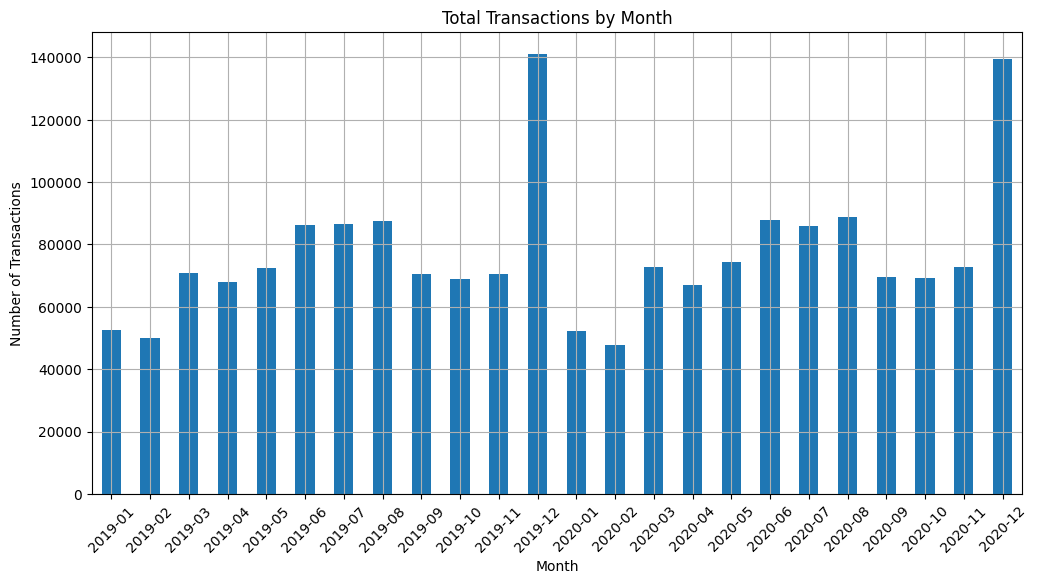

In [ ]:
# Plotting transactions by date
plt.figure(figsize=(12, 6))
transactions_by_month.plot(kind='bar')
plt.title('Total Transactions by Month')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [ ]:
customer_job_df = clean_df['job'].value_counts()
customer_job_df[:10]

job
Film/video editor             13898
Exhibition designer           13167
Surveyor, land/geomatics      12436
Naval architect               12434
Materials engineer            11711
Designer, ceramics/pottery    11688
Environmental consultant      10974
Financial adviser             10963
Systems developer             10962
IT trainer                    10943
Name: count, dtype: int64

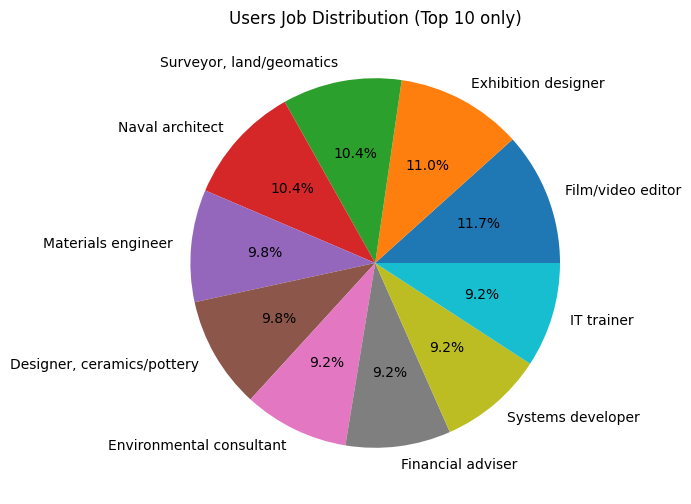

In [ ]:
# Pie Chart of Users Job Distribution (Top 10 only)
plt.figure(figsize=(8, 6))
customer_job_df[:10].plot(kind='pie', autopct='%1.1f%%')
plt.title('Users Job Distribution (Top 10 only)')
plt.ylabel('')
plt.show()

In [ ]:
# merchant
merchant_df = clean_df['merchant'].value_counts()
print(f"Total {len(merchant_df)} merchants were flagged for fraudulent activities.")

Total 693 merchants were flagged for fraudulent activities.


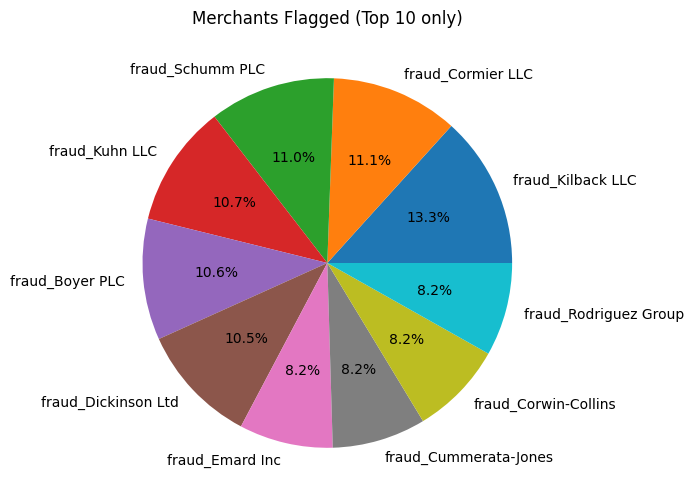

In [ ]:
# Pie Chart of Users Job Distribution (Top 10 only)
plt.figure(figsize=(8, 6))
merchant_df[:10].plot(kind='pie', autopct='%1.1f%%')
plt.title('Merchants Flagged (Top 10 only)')
plt.ylabel('')
plt.show()

In [ ]:
# Transactions by Age Group
from datetime import datetime
# Convert dob to datetime
clean_df['dob'] = pd.to_datetime(clean_df['dob'])

# Calculate age
current_year = datetime.now().year
clean_df['age'] = current_year - clean_df['dob'].dt.year

In [ ]:
# Create age groups
bins = [0, 18, 25, 35, 45, 55, 65, 75, 85, 100]
labels = ['0-18', '19-25', '26-35', '36-45', '46-55', '56-65', '66-75', '76-85', '86+']
clean_df['age_group'] = pd.cut(clean_df['age'], bins=bins, labels=labels, right=False)

In [ ]:
# Count transactions per age group
transactions_by_age_group = clean_df['age_group'].value_counts().sort_index()

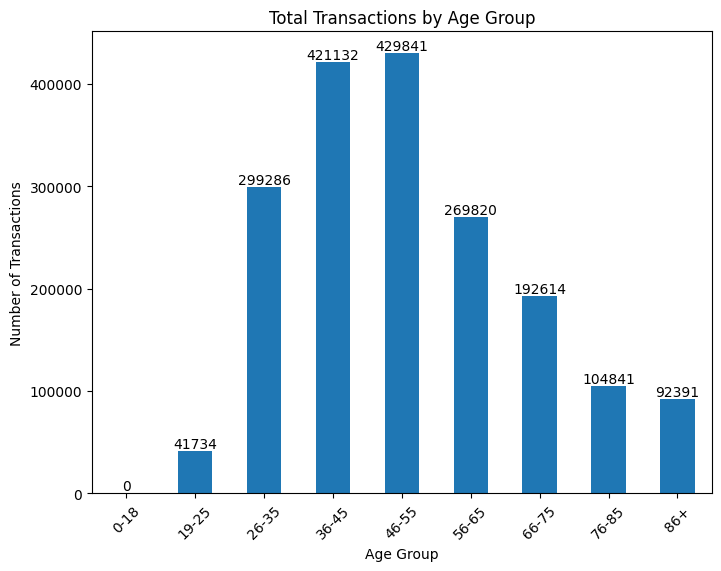

In [ ]:
# Plotting Transactions by Age Group
plt.figure(figsize=(8, 6))
transactions_by_age_group.plot(kind='bar')
add_labls(transactions_by_age_group.index,transactions_by_age_group.values)
plt.title('Total Transactions by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# is_fraud
fraud_data = clean_df['is_fraud'].value_counts()
fraud_data

is_fraud
0    1842743
1       9651
Name: count, dtype: int64